# Classification: Decision Trees

1. [Introduction](#Introduction)
2. [Decision Tree](#Decision-Tree)
3. [Data and Modules](#Data-and-Modules)
    - [Data | Defining features (X) and Lables (y) | Train and Test sets](#Data-and-Modules)
4. Choosing Model Parameters and Cross-Validation
4. Application Examples and Complex Cases
5. Pros and Cons of Decision Trees 
6. Resources

## Introduction

#### Background:
- **Audience**: The appropriate audience is for this walkthrough is Product Managers venturing into world of Machine Learning. We have someback ML background, mostly, theortical but want some hands on expereince to feel bit more authentic about ourseleves and gain practical experience. 

- **Purpose**: Build Intution for the process and have a template to run this alogrithm on your own data.

- **Definition**: A machine learning core concepts are simple, we can grow our in in. It is simply learning patterns from data. To learn something from something. Machine learning needs an learning algorithm to learn from data to draw a line. It's algorithm is an algorithm that is able to learn patterns (aka. ML task) from data (Experience), measured at performance (P). Our job is to "tune" the algoirthm to genralize i.e. to learn the patterns in a way that algorithm will continue to perform well on the new unseen data.


***

#### Objective: 
*Build inutition of hyperparameter tuning and learn decision tree*

#### Key Results: 
*Generate Confusion Matrix, Classification table, RoC, and RoC AUC for model performance pre and posting hyperparameter tuning.* 


## Decision Tree

Decision trees are used in everyday life decisions, not just in machine learning. Flow diagrams are actually visual representations of decision trees.


### Write about the basics of decision tree learning algoritim

<font color=blue|red|green|pink|yellow>Text</font>

## Data and Modules 

#### Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV

#### Data | Defining features (X) and Lables (y) | Train and Test sets

In [2]:
cancer = load_breast_cancer()
type(cancer)

sklearn.utils.Bunch

In [3]:
print(dir(cancer))

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


In [4]:
X = cancer.data
y = cancer.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

#### Classifier without Tuning  (auto picking)

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
clf_tree = DecisionTreeClassifier()

In [8]:
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(180.27692307692308, 203.85, 'X[7] <= 0.051\ngini = 0.471\nsamples = 381\nvalue = [145, 236]'),
 Text(122.33076923076923, 176.67000000000002, 'X[20] <= 16.83\ngini = 0.098\nsamples = 233\nvalue = [12, 221]'),
 Text(90.13846153846154, 149.49, 'X[10] <= 0.626\ngini = 0.045\nsamples = 219\nvalue = [5, 214]'),
 Text(64.38461538461539, 122.31, 'X[24] <= 0.178\ngini = 0.027\nsamples = 216\nvalue = [3, 213]'),
 Text(51.50769230769231, 95.13, 'X[14] <= 0.003\ngini = 0.018\nsamples = 215\nvalue = [2, 213]'),
 Text(25.753846153846155, 67.94999999999999, 'X[12] <= 1.568\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(12.876923076923077, 40.77000000000001, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(38.63076923076923, 40.77000000000001, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(77.26153846153846, 67.94999999999999, 'X[21] <= 33.35\ngini = 0.009\nsamples = 211\nvalue = [1, 210]'),
 Text(64.38461538461539, 40.77000000000001, 'gini = 0.0\nsamples = 199\nvalue = [0, 199]'),
 Tex

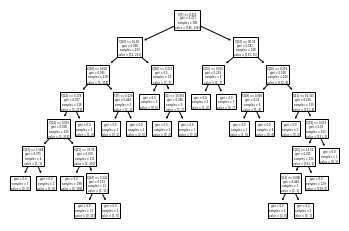

In [9]:
from sklearn import tree
tree.plot_tree(clf_tree.fit(X_train,y_train)) 

In [10]:
y_pred = clf_tree.predict(X_test)

#### Performance of untuned model

In [11]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 61   6]
 [ 13 108]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.87        67
           1       0.95      0.89      0.92       121

    accuracy                           0.90       188
   macro avg       0.89      0.90      0.89       188
weighted avg       0.90      0.90      0.90       188



### Compute predicted probabilities: y_pred_prob

In [12]:
y_pred_prob = clf_tree.predict_proba(X_test)[:,1]

### RoC Curve

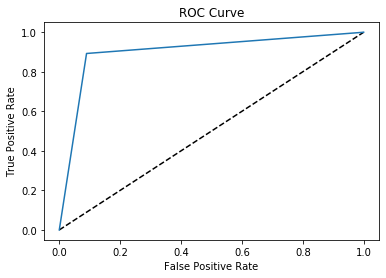

In [13]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Area Under the Curve

In [14]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.9015048723325522


### How does the model perform if I used kfold on X_train and y_train and use X_test and y_test as holdout set?


In [15]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": [1,9],
              "min_samples_leaf": [1,9],
              "criterion": ["gini", "entropy"]}


tree = DecisionTreeClassifier() 

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 1, 'max_features': 9, 'max_depth': 3, 'criterion': 'entropy'}
Best score is 0.9384885764499121


C:\Users\vipatha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [16]:
y_pred_tune = tree_cv.predict(X_test)

In [17]:
print(confusion_matrix(y_test,y_pred_tune))
print(classification_report(y_test,y_pred_tune))

[[ 60   7]
 [  2 119]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        67
           1       0.94      0.98      0.96       121

    accuracy                           0.95       188
   macro avg       0.96      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188



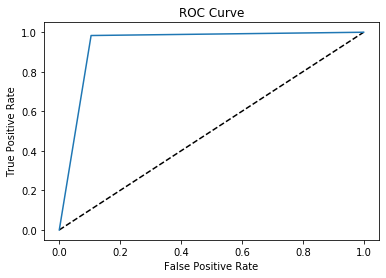

In [18]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_tune)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [19]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_tune)))

AUC: 0.9394967312199334
